# MLP Attempt

In [10]:
import pandas as pd
%reload_ext autoreload
%autoreload 2
from Classifiers.MyMLP import MyMLP

In [11]:
mlp = MyMLP('PreProcessingFiles/Data/PreProcessedData/File2/UnCleanData/data.csv', ['DX', 'PLASMA_NFL', 'PLASMAPTAU181', 'AB4240', 'MMSE', 'PTEDUCAT', 'AGE'])

## Now Train the MLP

In [12]:
mlp.test(metrics=True)

Accuracy: 0.645021645021645
              precision    recall  f1-score   support

          AD       0.67      0.71      0.69        34
         MCI       0.65      0.69      0.67       118
         SCD       0.63      0.56      0.59        79

    accuracy                           0.65       231
   macro avg       0.65      0.65      0.65       231
weighted avg       0.64      0.65      0.64       231



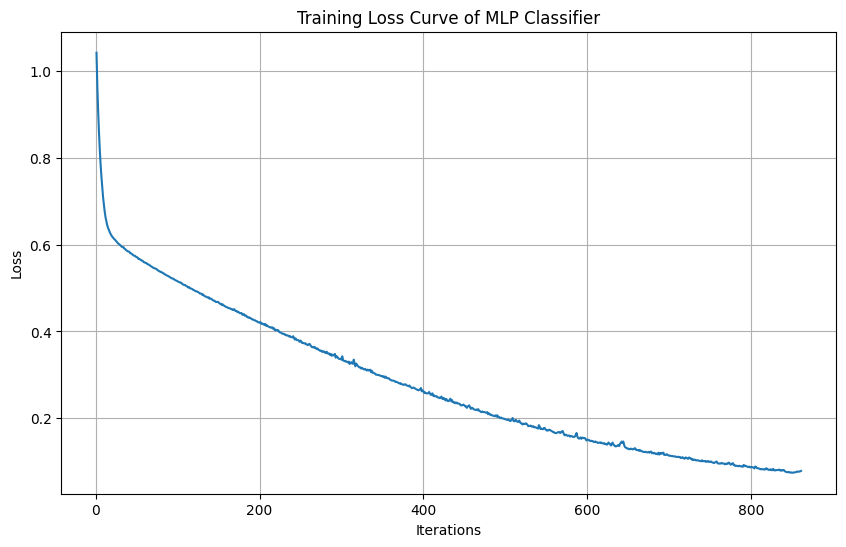

In [8]:
mlp.plot_loss()

# File 2

In [135]:
# Download the Data
df = pd.read_csv('PreProcessingFiles/Data/PreProcessedData/File1/UnCleanData/data.csv')[['DX', 'PLASMA_NFL', 'PLASMATAU', 'AB4240', 'MMSE', 'PTEDUCAT', 'AGE', 'PTGENDER']]
df.dropna(inplace=True)
df

,DX,PLASMA_NFL,PLASMATAU,AB4240,MMSE,PTEDUCAT,AGE,PTGENDER
0,SCD,28.2,2.41,0.331165,28.0,16,74.3,0
1,AD,188.3,3.84,0.220661,20.0,18,81.3,0
2,MCI,31.2,3.76,0.311458,27.0,10,67.5,0
3,SCD,36.3,3.81,0.189760,29.0,16,73.7,0
4,MCI,52.5,2.86,0.153287,25.0,13,80.4,1
...,...,...,...,...,...,...,...,...
574,AD,94.1,4.45,0.260446,23.0,20,69.3,0
575,AD,46.4,3.54,0.231390,21.0,15,65.9,0
576,MCI,18.7,1.45,0.130205,27.0,18,74.3,0
577,MCI,25.8,1.56,0.194001,28.0,17,77.9,0


In [136]:
y = df.pop("DX")
X = df

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the MLP classifier
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42, verbose=3)
mlp_classifier.fit(X_train_scaled, y_train)

# Predict the labels for the test set
y_pred = mlp_classifier.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Iteration 1, loss = 1.18907143
Iteration 2, loss = 1.11933498
Iteration 3, loss = 1.06976437
Iteration 4, loss = 1.02968507
Iteration 5, loss = 0.99472573
Iteration 6, loss = 0.96324898
Iteration 7, loss = 0.93519261
Iteration 8, loss = 0.90888705
Iteration 9, loss = 0.88462029
Iteration 10, loss = 0.86179827
Iteration 11, loss = 0.84049249
Iteration 12, loss = 0.82035048
Iteration 13, loss = 0.80123060
Iteration 14, loss = 0.78299688
Iteration 15, loss = 0.76555877
Iteration 16, loss = 0.74858381
Iteration 17, loss = 0.73216867
Iteration 18, loss = 0.71671684
Iteration 19, loss = 0.70198443
Iteration 20, loss = 0.68808757
Iteration 21, loss = 0.67450823
Iteration 22, loss = 0.66266123
Iteration 23, loss = 0.65226588
Iteration 24, loss = 0.64304726
Iteration 25, loss = 0.63439015
Iteration 26, loss = 0.62777500
Iteration 27, loss = 0.62187152
Iteration 28, loss = 0.61285856
Iteration 29, loss = 0.60256698
Iteration 30, loss = 0.59451074
Iteration 31, loss = 0.58785733
Iteration 32, los

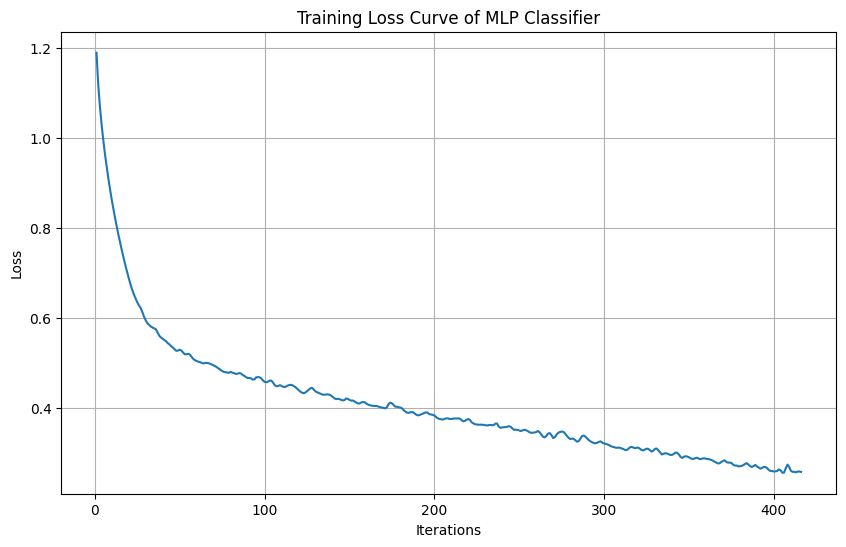

[16.69182436 15.59963621 15.29015967 19.1540015  15.80553848 15.18766308
 13.40755647]


In [137]:
# Plot the loss curve
from matplotlib import pyplot as plt
import numpy as np


plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, len(mlp_classifier.loss_curve_) + 1), mlp_classifier.loss_curve_, linestyle='-')
plt.title('Training Loss Curve of MLP Classifier')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

# Extract weights connecting input layer to first hidden layer
input_hidden_weights = mlp_classifier.coefs_[0]

# Calculate feature importance as the sum of absolute weights for each feature
feature_importance = np.sum(np.abs(input_hidden_weights), axis=1)

print(feature_importance)

In [138]:
from sklearn.metrics import classification_report


print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          AD       0.78      0.76      0.77        38
         MCI       0.59      0.50      0.54        32
         SCD       0.77      0.91      0.83        33

    accuracy                           0.73       103
   macro avg       0.72      0.72      0.72       103
weighted avg       0.72      0.73      0.72       103

